# Task 1  

## General instructions

First, update the following text to have a link to your Homework 2 GitHub repository:

**UPDATE THIS LINK**
https://github.com/p-park6/eds220-hwk-3

Add comments for all your code and commit as needed. Err on the side of commenting and commiting too much for now. Points will be deducted for insufficient comments.


## About the data
In this task you will use two datsets:

**First dataset**

The first dataset contains information about [spilling incidents in the state of New York](https://data.ny.gov/Energy-Environment/Spill-Incidents/u44d-k5fk). 
The data portal has plenty of information. 
You will find extra information and metadata for this datset in the 'NYSDEC_SpillIncidents_Overview.pdf' and 'NYSDEC_SpillIncidents_DataDictionary.pdf' documents available at the portal.

You can access this datset via its URL or download it as a csv. 
If you chose to access it via URL, it will take a while to load every time you import it. 

**Second dataset**

The second dataset is a [TIGER shapefile from the United States Census Bureau](https://www.census.gov/geographies/mapping-files/time-series/geo/tiger-line-file.2022.html#list-tab-790442341). 
For this task you will need to **download the 2022 counties (and equivalent) TIGER shapefile**. 
You can check the [metadata for all the TIGER shapefiles here](https://www.census.gov/programs-surveys/geography/technical-documentation/complete-technical-documentation/tiger-geo-line.html). 



## File management
Make sure all your data files are inside a directory named 'data' inside your repository's directory (working directory).

## Datasets description
Read the metadata for both datsets and write a brief description about each once. Indicate the data sources and date of access.

**Spilling Incidents in New York**
This dataset covers the confirmed or suspected hazard spills to have occured in the New York State. Documentation reveals that many of these spills happen in low quantities but those that are not properly cleaned up have detrimental effects to the surrounding environment, such as the air, water, or soil quality. Data was collected in a number of ways, but was ultimately collected by the New York State Department of Environmental Conservation, Division of Environmental Remediation. This dataset was created in October 19, 2015 and is regularly updated. Metadata is provided for this dataset found [here](https://data.ny.gov/api/views/u44d-k5fk/files/dkNFaHGMV5gZ-YPfr7TdMFOyrIIsIYhQ2xfuWjAKdHk?download=true&filename=NYSDEC_SpillIncidents_Overview.pdf)

- Data source retreived from this [csv link](https://data.ny.gov/api/views/u44d-k5fk/rows.csv?date=20231108&accessType=DOWNLOAD&sorting=true). Data was provided by New York State Department of Environmental Conservation
- Date of access: November 7, 2023


**2022 counties (and equivalent) TIGER shapefile**
This dataset contains current geographic extent and boundaries of counties found in the United States, the District of Columbia,
Puerto Rico, and the Island Areas. Shapefiles can be represented either as lines, points, or polygons. For this dataset, the data is represented as polygons. This data was collected and prepared by the U.S. Census Bureau. These shapefiles were first created in 1989 and continue to be updated to this day. Metadata is provided for this dataset found [here](https://www2.census.gov/geo/pdfs/maps-data/data/tiger/tgrshp2022/TGRSHP2022_TechDoc.pdf)

- Data source retreived from this [site](https://www.census.gov/cgi-bin/geo/shapefiles/index.php). Options *Select Year* was 2022 and *Select a layer type* was countries (and equivalent)
- Date of access: November 7, 2023

## FINAL CODE

You will use the next cell at the end of the task. Leave it blank for now. 

<AxesSubplot:title={'center':'Number of Spills in New York State'}>

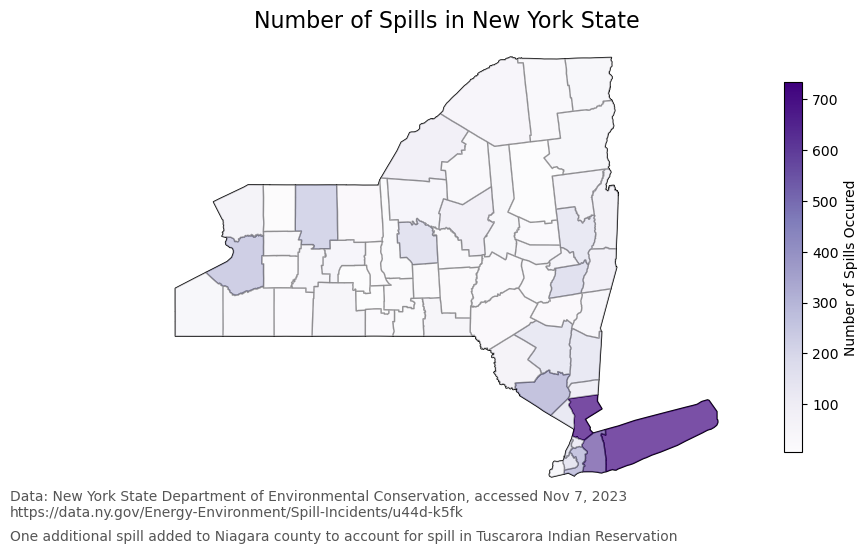

In [1]:
### ===== FINAL CODE =====
#import needed libraries
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# load in spills and county data
spills = pd.read_csv('https://data.ny.gov/api/views/u44d-k5fk/rows.csv?date=20231106&accessType=DOWNLOAD&sorting=true')
counties = gpd.read_file('data/tl_2022_us_county.shp')

#reformat columns to be all lower case
spills.columns = spills.columns.str.lower()

#reformat column names for spaces to be replaced by _
spills.columns = spills.columns.str.replace(" ", "_")

#change spill_date column to datetime datatype
spills.spill_date = pd.to_datetime(spills.spill_date)

#filter for dates and material type
petr_23 = spills.loc[(spills['spill_date'] >= '2023-1-1') & #filter starting at January 1 2023
                     (spills['spill_date'] <= '2023-10-31') & #filter ending at October 31 2023
                     (spills['material_family'] == 'Petroleum')] #filter for the material_family for 'Petroleum'

#group by county and use count to see how many observations are in each column
spill_temp = petr_23.groupby(['county']).count()

#filter for spill_number column into new dataframe
spills_per_county = spill_temp[['spill_number']]

#rename columns from spill_number to n_spills and reset index
spills_per_county = spills_per_county.rename(columns = {'spill_number' : 'n_spills'}).reset_index()

#reformat columns names to be all lower case
counties.columns = counties.columns.str.lower()

#filter for just New York using the statefp column
ny_counties = counties[counties.statefp == '36']

#select the first item in that tuple using [0]
st_lawrence_index = spills_per_county[spills_per_county.county=='St Lawrence'].index[0]

#rename St Lawrence to St. Lawrence
spills_per_county.at[st_lawrence_index, 'county'] = 'St. Lawrence'

#rename ny_counties column 'name' to 'county_name' for easier join
ny_counties = ny_counties.rename(columns={'name':'county_name'})

#rename spills_per_county column 'county' to 'county name' for easier join
spills_per_county = spills_per_county.rename(columns = {'county':'county_name'})

#merge two datasets by overwriting ny_counties dataframe
ny_counties = pd.merge(ny_counties, #first dataset
                            spills_per_county, #second dataset
                            how='inner', #merge by inner join
                            on='county_name') #merge using 'county_name' as reference

#add one extra value to Niagra county to account for the 'Tuscarora Indian Reservation' not being accounted for
ny_counties.at[45, 'n_spills'] += 1

#Create an empty figure
fig, ax = plt.subplots(figsize=(10, 6))

#turn off axis
ax.axis('off')

#Put a title on the map
ax.set_title('Number of Spills in New York State', #add map title
fontsize=16) #change font size

# annotate the data source
ax.annotate("Data: New York State Department of Environmental Conservation, accessed Nov 7, 2023 \nhttps://data.ny.gov/Energy-Environment/Spill-Incidents/u44d-k5fk", 
            xy=(0.01, .07), # position of text
            xycoords='figure fraction', #coordinates are in range 0 to 1
            fontsize=10, #change font size
            color='#555555') #color

#add additional comment about the additional spill added to Niagara county
ax.annotate("One additional spill added to Niagara county to account for spill in Tuscarora Indian Reservation", 
            xy=(0.01, .03), # position of text
            xycoords='figure fraction', #coordinates are in range 0 to 1
            fontsize=10, #change font size
            color='#555555') #color

# add New York county to map
ny_counties.plot(ax=ax,
               color='none', #no color
               edgecolor = 'black') #border color is black

# add n_spills to map
ny_counties.plot(ax=ax, 
                  column='n_spills', #data column is using n_spills
                  legend=True, #add legend
                  cmap='Purples', #have color be purple hue
                  alpha=0.7, #transparency is 0.7
                  # adjust legend
                  legend_kwds={"shrink":.8, #shrink the legend
                                    'label': "Number of Spills Occured"}) #label the legend

<!-- write your description in this markdwon cell -->

## Import libraries

In [2]:
# import libraries here
# import numpy too
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Import data 
In the next cell:

- Import the NY spills data as a variable named `spills`. 
- Import the US counties shapefile as a variable named `counties`.


In [3]:
# load in spills and county data
spills = pd.read_csv('https://data.ny.gov/api/views/u44d-k5fk/rows.csv?date=20231106&accessType=DOWNLOAD&sorting=true')
counties = gpd.read_file('data/tl_2022_us_county.shp')

<AxesSubplot:>

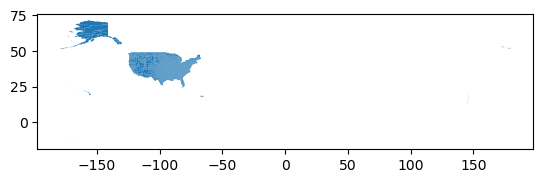

In [4]:
#plot counties data to see what it looks like
counties.plot()

## Prepare spills data

This section refers to the `spills` dataframe. 
Check the outputs carefully, they will give you context about the next exercises.

### Exploration

In the next cells:

1. Check the dataframe's head
2. Simplify column names as needed
3. Check the data types of the columns
4. Check the unique values in the `material_family` column
5. Check the unique values in the `county` column

You can add any other cells of preliminary data exploration.

In [5]:
# 1.
#look at first five entries in spills dataframe
spills.head()

,Spill Number,Program Facility Name,Street 1,Street 2,Locality,County,ZIP Code,SWIS Code,DEC Region,Spill Date,Received Date,Contributing Factor,Waterbody,Source,Close Date,Material Name,Material Family,Quantity,Units,Recovered
0,107132,MH 864,RT 119/MILLWOOD RD,NaN,ELMSFORD,Westchester,NaN,6000,3,10/10/2001,10/10/2001,Unknown,NaN,Unknown,10/15/2001,unknown material,Other,10.0,Gallons,0.0
1,405586,BOWRY BAY,WATER POLL CONTROL,NaN,QUEENS,Queens,NaN,4101,2,08/21/2004,08/21/2004,Other,EAST RIVER,Unknown,09/17/2004,raw sewage,Other,0.0,Pounds,0.0
2,405586,BOWRY BAY,WATER POLL CONTROL,NaN,QUEENS,Queens,NaN,4101,2,08/21/2004,08/21/2004,Other,EAST RIVER,Unknown,09/17/2004,raw sewage,Other,0.0,NaN,0.0
3,204667,POLE 16091,GRACE AVE/BURKE AVE,NaN,BRONX,Bronx,NaN,301,2,08/02/2002,08/02/2002,Equipment Failure,NaN,Commercial/Industrial,10/28/2002,transformer oil,Petroleum,1.0,Gallons,0.0
4,210559,POLE ON,FERDALE LOMIS RD / RT 52,NaN,LIBERTY,Sullivan,NaN,5336,3,01/20/2003,01/20/2003,Traffic Accident,NaN,Commercial/Industrial,01/22/2003,transformer oil,Petroleum,6.0,Gallons,6.0


In [6]:
# 2.
#reformat columns to be all lower case
spills.columns = spills.columns.str.lower()
#print out spills column names to see if they are now lowercase
spills.columns

Index(['spill number', 'program facility name', 'street 1', 'street 2',
       'locality', 'county', 'zip code', 'swis code', 'dec region',
       'spill date', 'received date', 'contributing factor', 'waterbody',
       'source', 'close date', 'material name', 'material family', 'quantity',
       'units', 'recovered'],
      dtype='object')

In [7]:
#reformat column names for spaces to be replaced by _
spills.columns = spills.columns.str.replace(" ", "_")
#print out spills column names to see if the spaces have been replaced by "_"
spills.columns

Index(['spill_number', 'program_facility_name', 'street_1', 'street_2',
       'locality', 'county', 'zip_code', 'swis_code', 'dec_region',
       'spill_date', 'received_date', 'contributing_factor', 'waterbody',
       'source', 'close_date', 'material_name', 'material_family', 'quantity',
       'units', 'recovered'],
      dtype='object')

In [8]:
# 3.
#look at the datatypes per each column 
spills.dtypes

spill_number               int64
program_facility_name     object
street_1                  object
street_2                  object
locality                  object
county                    object
zip_code                  object
swis_code                  int64
dec_region                 int64
spill_date                object
received_date             object
contributing_factor       object
waterbody                 object
source                    object
close_date                object
material_name             object
material_family           object
quantity                 float64
units                     object
recovered                float64
dtype: object

In [9]:
# 4.
#look at the unique values in the material_family column
spills.material_family.unique()

array(['Other', 'Petroleum', 'Hazardous Material', 'Oxygenates'],
      dtype=object)

In [10]:
# 5.
#look at the unique values in the county column
spills.county.unique()

array(['Westchester', 'Queens', 'Bronx', 'Sullivan', 'Cortland',
       'New York', 'Ulster', 'Kings', 'Orange', 'Dutchess', 'Onondaga',
       'Saratoga', 'Cayuga', 'Oswego', 'Warren', 'Niagara', 'Rockland',
       'Nassau', 'Jefferson', 'Schenectady', 'Albany', 'Monroe',
       'St Lawrence', 'Richmond', 'Clinton', 'Lewis', 'Essex', 'Chenango',
       'Erie', 'Livingston', 'Wayne', 'Suffolk', 'Orleans', 'Ontario',
       'Genesee', 'Otsego', 'Tompkins', 'Madison', 'Chemung', 'Seneca',
       'Oneida', 'Broome', 'Hamilton', 'Washington', 'Schuyler',
       'Franklin', 'Columbia', 'Fulton', 'Herkimer', 'Schoharie',
       'Rensselaer', 'Montgomery', 'Putnam', 'Delaware',
       'New Jersey - Region 2', 'Steuben', 'Tioga', 'Chautauqua',
       'Cattaraugus', 'Wyoming', 'Yates', 'Greene',
       'Pennsylvania - Region 9', 'Allegany', 'New Jersey - Region 3 (N)',
       'Cattaraugus Indian Reservation', 'New Jersey - Region 3 (T)',
       'Canada - Region 6', 'Canada - Region 9',
       '

In [11]:
#Extra exploration:
#look at number of unique values in each column
spills.nunique()

spill_number             513560
program_facility_name    299991
street_1                 371463
street_2                  33204
locality                   9952
county                       87
zip_code                   2161
swis_code                  1075
dec_region                    9
spill_date                15941
received_date             15871
contributing_factor          14
waterbody                  8196
source                       16
close_date                13993
material_name              5806
material_family               4
quantity                   1704
units                         2
recovered                   711
dtype: int64

In [12]:
#look at the infor in the spills column
spills.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 542360 entries, 0 to 542359
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   spill_number           542360 non-null  int64  
 1   program_facility_name  542354 non-null  object 
 2   street_1               542229 non-null  object 
 3   street_2               42219 non-null   object 
 4   locality               541238 non-null  object 
 5   county                 542360 non-null  object 
 6   zip_code               51207 non-null   object 
 7   swis_code              542360 non-null  int64  
 8   dec_region             542360 non-null  int64  
 9   spill_date             542208 non-null  object 
 10  received_date          541879 non-null  object 
 11  contributing_factor    542360 non-null  object 
 12  waterbody              46311 non-null   object 
 13  source                 542360 non-null  object 
 14  close_date             531693 non-nu

### Data selection

1. Select data about petroleum spills that took place between January 1st 2023, and October 31st (including both dates), 2023. Store it in a variable named `petr_23`. The data selection should occur in a single line. You may add cells if you needed.

In [13]:
#change spill_date column to datetime datatype
spills.spill_date = pd.to_datetime(spills.spill_date)
#check if it has been converted
spills.spill_date

0        2001-10-10
1        2004-08-21
2        2004-08-21
3        2002-08-02
4        2003-01-20
            ...    
542355   1999-07-06
542356   2003-07-28
542357   1993-03-02
542358   1990-01-05
542359   2001-06-13
Name: spill_date, Length: 542360, dtype: datetime64[ns]

In [14]:
#look at the datatypes to see if spill_date data type has been changed
spills.dtypes

spill_number                      int64
program_facility_name            object
street_1                         object
street_2                         object
locality                         object
county                           object
zip_code                         object
swis_code                         int64
dec_region                        int64
spill_date               datetime64[ns]
received_date                    object
contributing_factor              object
waterbody                        object
source                           object
close_date                       object
material_name                    object
material_family                  object
quantity                        float64
units                            object
recovered                       float64
dtype: object

In [15]:
#look at the first five rows of the spills dataframe
spills.head()

,spill_number,program_facility_name,street_1,street_2,locality,county,zip_code,swis_code,dec_region,spill_date,received_date,contributing_factor,waterbody,source,close_date,material_name,material_family,quantity,units,recovered
0,107132,MH 864,RT 119/MILLWOOD RD,NaN,ELMSFORD,Westchester,NaN,6000,3,2001-10-10,10/10/2001,Unknown,NaN,Unknown,10/15/2001,unknown material,Other,10.0,Gallons,0.0
1,405586,BOWRY BAY,WATER POLL CONTROL,NaN,QUEENS,Queens,NaN,4101,2,2004-08-21,08/21/2004,Other,EAST RIVER,Unknown,09/17/2004,raw sewage,Other,0.0,Pounds,0.0
2,405586,BOWRY BAY,WATER POLL CONTROL,NaN,QUEENS,Queens,NaN,4101,2,2004-08-21,08/21/2004,Other,EAST RIVER,Unknown,09/17/2004,raw sewage,Other,0.0,NaN,0.0
3,204667,POLE 16091,GRACE AVE/BURKE AVE,NaN,BRONX,Bronx,NaN,301,2,2002-08-02,08/02/2002,Equipment Failure,NaN,Commercial/Industrial,10/28/2002,transformer oil,Petroleum,1.0,Gallons,0.0
4,210559,POLE ON,FERDALE LOMIS RD / RT 52,NaN,LIBERTY,Sullivan,NaN,5336,3,2003-01-20,01/20/2003,Traffic Accident,NaN,Commercial/Industrial,01/22/2003,transformer oil,Petroleum,6.0,Gallons,6.0


In [16]:
#filter for dates and material type
petr_23 = spills.loc[(spills['spill_date'] >= '2023-1-1') & #filter starting at January 1 2023
                     (spills['spill_date'] <= '2023-10-31') & #filter ending at October 31 2023
                     (spills['material_family'] == 'Petroleum')] #filter for the material_family for 'Petroleum'
#look at dataframe to check if work was done properly
petr_23

,spill_number,program_facility_name,street_1,street_2,locality,county,zip_code,swis_code,dec_region,spill_date,received_date,contributing_factor,waterbody,source,close_date,material_name,material_family,quantity,units,recovered
220,2301892,*** TEST SPILL ***,*** TEST SPILL ***,NaN,*** TEST SPILL ***,Onondaga,00000,3415,7,2023-06-06,06/06/2023,Tank Test Failure,NaN,Unknown,07/12/2023,#2 fuel oil,Petroleum,0.0,Gallons,0.0
221,2301892,*** TEST SPILL ***,*** TEST SPILL ***,NaN,*** TEST SPILL ***,Onondaga,00000,3415,7,2023-06-06,06/06/2023,Tank Test Failure,NaN,Unknown,07/12/2023,"used oil (heating, on-site consumption)",Petroleum,0.0,NaN,0.0
222,2301892,*** TEST SPILL ***,*** TEST SPILL ***,NaN,*** TEST SPILL ***,Onondaga,00000,3415,7,2023-06-06,06/06/2023,Tank Test Failure,NaN,Unknown,07/12/2023,#2 fuel oil (on-site consumption),Petroleum,0.0,NaN,0.0
223,2301892,*** TEST SPILL ***,*** TEST SPILL ***,NaN,*** TEST SPILL ***,Onondaga,00000,3415,7,2023-06-06,06/06/2023,Tank Test Failure,NaN,Unknown,07/12/2023,Diesel (E-Gen),Petroleum,0.0,NaN,0.0
225,2301892,*** TEST SPILL ***,*** TEST SPILL ***,NaN,*** TEST SPILL ***,Onondaga,00000,3415,7,2023-06-06,06/06/2023,Tank Test Failure,NaN,Unknown,07/12/2023,waste oil/used oil,Petroleum,0.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541857,2208600,ZHANG RESIDENCE,11 ACORN LANE,NaN,STONY BROOK,Suffolk,NaN,5222,1,2023-01-22,01/22/2023,Equipment Failure,NaN,Private Dwelling,01/31/2023,#2 fuel oil,Petroleum,5.0,Gallons,0.0
541860,2303072,ZHANG RESIDENCE,93 CHERRY LANE,NaN,HICKSVILLE,Nassau,NaN,3024,1,2023-07-14,07/14/2023,Equipment Failure,NaN,Private Dwelling,09/18/2023,#2 fuel oil,Petroleum,0.0,NaN,0.0
541970,2208304,ZIMMERMAN - UST,19 MOUNTAIN AVENUE,NaN,LARCHMONT,Westchester,NaN,6032,3,2023-01-10,01/10/2023,Equipment Failure,NaN,Private Dwelling,NaN,#2 fuel oil,Petroleum,0.0,NaN,0.0
542253,2301301,ZULTOWSKY - UST,514 PELHAM MANOR RD,NaN,PELHAM,Westchester,NaN,6044,3,2023-05-16,05/16/2023,Equipment Failure,NaN,Private Dwelling,07/11/2023,#2 fuel oil,Petroleum,0.0,NaN,0.0


In [17]:
#check if there are any NA in material_family column
petr_23.material_family.value_counts(dropna = False)

Petroleum    7156
Name: material_family, dtype: int64

2. Verify that `petr_23` only has data for petroleum spills 

In [18]:
#look at the unique values in material_family column
petr_23.material_family.unique()

array(['Petroleum'], dtype=object)

3. Verify that `petr_23` only has data for 2023. 
HINT: if you converted the `spill_date` column to datetime, you can use `petr_23.spill_date.dt.year.unique()`

In [19]:
#look if only the year 2023 is in the filtered dataframe
petr_23.spill_date.dt.year.unique()

array([2023])

4. Verify that `petr_23` only has data from January to October. 

In [20]:
#look to see if only months 1 to 10 are in the filtered dataframe
petr_23.spill_date.dt.month.unique()

array([ 6,  8,  9,  7,  1,  2,  3, 10,  5,  4])

### Data aggregation

Create new dataframe named `spills_per_county` with the number of petroleum spills per county from January to October 2023 (i.e. use the `petr_23` dataframe).

The resulting `spills_per_county` dataframe must be as follows:

- Index: integer numbers starting from 0
- Column one: county names, column name = `county`
- Column two: number of petroleum spills per county in 2023, column name = `n_spills`

You may add cells if you needed.

In [21]:
#group by county and use count to see how many observations are in each column
spill_temp = petr_23.groupby(['county']).count()
#check dataframe that is created
spill_temp

,spill_number,program_facility_name,street_1,street_2,locality,zip_code,swis_code,dec_region,spill_date,received_date,contributing_factor,waterbody,source,close_date,material_name,material_family,quantity,units,recovered
county,,,,,,,,,,,,,,,,,,,
Albany,204,204,204,35,204,7,204,204,204,204,204,0,204,102,204,204,204,123,204
Allegany,30,30,30,1,30,2,30,30,30,30,30,6,30,23,30,30,30,15,30
Bronx,143,143,143,2,143,3,143,143,143,143,143,1,143,102,143,143,143,59,143
Broome,74,74,74,1,74,18,74,74,74,74,74,8,74,45,74,74,74,41,74
Cattaraugus,46,46,46,5,46,1,46,46,46,46,46,1,46,34,46,46,46,33,46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Washington,96,96,96,17,95,7,96,96,96,96,96,3,96,41,96,96,96,47,96
Wayne,38,38,38,4,38,2,38,38,38,38,38,3,38,29,38,38,38,22,38
Westchester,734,734,734,54,734,14,734,734,734,734,734,8,734,549,734,734,734,295,734


In [22]:
#check if the index (which is counties) have any NAs
spill_temp.index.hasnans

False

In [23]:
#filter for spill_number column into new dataframe
spills_per_county = spill_temp[['spill_number']]
#see if filtering was done properly
spills_per_county

,spill_number
county,
Albany,204
Allegany,30
Bronx,143
Broome,74
Cattaraugus,46
...,...
Washington,96
Wayne,38
Westchester,734


In [24]:
#rename columns from spill_number to n_spills and reset index
spills_per_county = spills_per_county.rename(columns = {'spill_number' : 'n_spills'}).reset_index()
#see if rename and index reset was dont properly
spills_per_county

,county,n_spills
0,Albany,204
1,Allegany,30
2,Bronx,143
3,Broome,74
4,Cattaraugus,46
...,...,...
59,Washington,96
60,Wayne,38
61,Westchester,734
62,Wyoming,24


## Prepare counties data

This section refers to the `counties` geodataframe. 
Check the outputs carefully, they will give you context about the next exercises.

### Exploration

In the next cells:

1. Check the geo-dataframe's head
2. Simplify column names as needed
3. Check the data types of the columns
4. Check the geo-dataframe's CRS
5. Plot the geo-dataframe.

You can add any other cells of preliminary data exploration.

In [25]:
# 1.
#look at first five rows of counties dataframe
counties.head()

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,31,039,00835841,31039,Cuming,Cuming County,06,H1,G4020,None,None,None,A,1477644346,10691216,+41.9158651,-096.7885168,"POLYGON ((-96.55515 41.91587, -96.55515 41.914..."
1,53,069,01513275,53069,Wahkiakum,Wahkiakum County,06,H1,G4020,None,None,None,A,680980770,61564427,+46.2946377,-123.4244583,"POLYGON ((-123.72755 46.26449, -123.72755 46.2..."
2,35,011,00933054,35011,De Baca,De Baca County,06,H1,G4020,None,None,None,A,6016818946,29090018,+34.3592729,-104.3686961,"POLYGON ((-104.89337 34.08894, -104.89337 34.0..."
3,31,109,00835876,31109,Lancaster,Lancaster County,06,H1,G4020,None,None,None,A,2169272978,22847034,+40.7835474,-096.6886584,"POLYGON ((-96.68493 40.52330, -96.69219 40.523..."
4,31,129,00835886,31129,Nuckolls,Nuckolls County,06,H1,G4020,None,None,None,A,1489645185,1718484,+40.1764918,-098.0468422,"POLYGON ((-98.27370 40.11840, -98.27374 40.122..."


In [26]:
# 2.
#reformat columns names to be all lower case
counties.columns = counties.columns.str.lower()
#check columns to see if they have been reformatted
counties.columns

Index(['statefp', 'countyfp', 'countyns', 'geoid', 'name', 'namelsad', 'lsad',
       'classfp', 'mtfcc', 'csafp', 'cbsafp', 'metdivfp', 'funcstat', 'aland',
       'awater', 'intptlat', 'intptlon', 'geometry'],
      dtype='object')

In [27]:
# 3. 
#look at datatypes of the columns
counties.dtypes

statefp       object
countyfp      object
countyns      object
geoid         object
name          object
namelsad      object
lsad          object
classfp       object
mtfcc         object
csafp         object
cbsafp        object
metdivfp      object
funcstat      object
aland          int64
awater         int64
intptlat      object
intptlon      object
geometry    geometry
dtype: object

In [28]:
# 4. 
#look at the counties crs
counties.crs
#crs is GRS 1980

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - NAD83
- bounds: (167.65, 14.92, -47.74, 86.46)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

<AxesSubplot:>

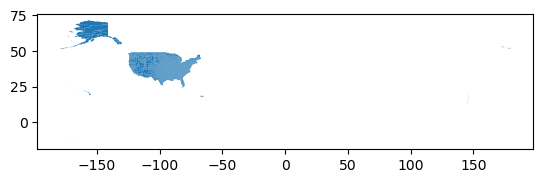

In [29]:
# 5. 
#plot the counties dataset
counties.plot()

In [30]:
#additional exploration
#look at these informations inspired by Carmen in class
print('is geographic?: ', counties.crs.is_geographic)
print('is projected?: ', counties.crs.is_projected)
print('datum: ', counties.crs.datum)
print('ellipsoid: ', counties.crs.ellipsoid)


is geographic?:  True
is projected?:  False
datum:  North American Datum 1983
ellipsoid:  GRS 1980


In [31]:
#look at the number of unique values in each column
counties.nunique()

statefp       56
countyfp     333
countyns    3235
geoid       3235
name        1927
namelsad    1973
lsad          12
classfp        5
mtfcc          1
csafp          0
cbsafp         0
metdivfp       0
funcstat       7
aland       3235
awater      3235
intptlat    3235
intptlon    3235
geometry    3235
dtype: int64

In [32]:
#look at the info of the counties dataframe
counties.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 3235 entries, 0 to 3234
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   statefp   3235 non-null   object  
 1   countyfp  3235 non-null   object  
 2   countyns  3235 non-null   object  
 3   geoid     3235 non-null   object  
 4   name      3235 non-null   object  
 5   namelsad  3235 non-null   object  
 6   lsad      3235 non-null   object  
 7   classfp   3235 non-null   object  
 8   mtfcc     3235 non-null   object  
 9   csafp     0 non-null      object  
 10  cbsafp    0 non-null      object  
 11  metdivfp  0 non-null      object  
 12  funcstat  3235 non-null   object  
 13  aland     3235 non-null   int64   
 14  awater    3235 non-null   int64   
 15  intptlat  3235 non-null   object  
 16  intptlon  3235 non-null   object  
 17  geometry  3235 non-null   geometry
dtypes: geometry(1), int64(2), object(15)
memory usage: 455.0+ KB


### Data selection

Select all the counties for the state of New York in a new variable `ny_counties` and plot them. HINT: to find which counties correspond to NY, look at the metadata.

In [33]:
#New York statefp is 36
#filter for just New York using the statefp column
ny_counties = counties[counties.statefp == '36']

In [34]:
#look at the first five rows in ny_counties
ny_counties.head()

,statefp,countyfp,countyns,geoid,name,namelsad,lsad,classfp,mtfcc,csafp,cbsafp,metdivfp,funcstat,aland,awater,intptlat,intptlon,geometry
46,36,101,00974148,36101,Steuben,Steuben County,06,H1,G4020,None,None,None,A,3601398422,35039875,+42.2667252,-077.3855253,"POLYGON ((-77.08327 42.00002, -77.09391 41.999..."
165,36,091,00974143,36091,Saratoga,Saratoga County,06,H1,G4020,None,None,None,A,2097812305,87488004,+43.1061353,-073.8553872,"POLYGON ((-73.67891 42.91221, -73.67938 42.911..."
173,36,003,00974100,36003,Allegany,Allegany County,06,H1,G4020,None,None,None,A,2666225086,12989848,+42.2478532,-078.0261531,"POLYGON ((-78.04342 42.51846, -78.04326 42.518..."
203,36,075,00974136,36075,Oswego,Oswego County,06,H1,G4020,None,None,None,A,2464636023,933469962,+43.4614431,-076.2092618,"POLYGON ((-76.02509 43.70702, -76.02004 43.706..."
210,36,111,00974153,36111,Ulster,Ulster County,06,H1,G4020,None,None,None,A,2911757764,94596810,+41.9472124,-074.2654582,"POLYGON ((-74.07480 42.09659, -74.06441 42.120..."


In [35]:
#look at the unique values found in statefp column
print(ny_counties.statefp.unique())

['36']


## Merging

The goal of this section is to create a single dataframe with the number of spills per county and the corresponding geometries for each county.

### Explore data

In the next cells:

1. Print the names of counties in `ny_counties`, without repetition.
2. Print the names of counties in `spills_per_county`, without repetition. (Do you notice anything?)
3. Use the [`numpy` function `setdiff1d()`](https://numpy.org/doc/stable/reference/generated/numpy.setdiff1d.html) to find the county names that are in `spills_per_county`, but not in `ny_counties`. HINT: pay attention to the example in the documentation.
4. Find the county names that are in `ny_counties`, but not in `spills_per_county`.
5. Check the number of spills in 'Tuscarora Indian Reservation'.


In [36]:
# 1.
#look at the column names of ny_counties
ny_counties.name.unique()

array(['Steuben', 'Saratoga', 'Allegany', 'Oswego', 'Ulster',
       'St. Lawrence', 'Schuyler', 'Essex', 'Suffolk', 'Hamilton',
       'Dutchess', 'Otsego', 'Tompkins', 'Albany', 'Cayuga', 'Greene',
       'Herkimer', 'Warren', 'Jefferson', 'Clinton', 'Nassau', 'Madison',
       'Washington', 'Westchester', 'Lewis', 'Ontario', 'Cortland',
       'Richmond', 'Erie', 'Putnam', 'Montgomery', 'Sullivan', 'Orleans',
       'Oneida', 'Cattaraugus', 'Yates', 'Tioga', 'Monroe', 'Schoharie',
       'Broome', 'Rensselaer', 'Seneca', 'Queens', 'Genesee', 'Wayne',
       'Niagara', 'Kings', 'Chemung', 'Wyoming', 'New York', 'Columbia',
       'Chautauqua', 'Franklin', 'Onondaga', 'Chenango', 'Fulton',
       'Rockland', 'Livingston', 'Delaware', 'Orange', 'Schenectady',
       'Bronx'], dtype=object)

In [37]:
# 2.
#look at the column names of spills_per_county
spills_per_county.county.unique()

array(['Albany', 'Allegany', 'Bronx', 'Broome', 'Cattaraugus', 'Cayuga',
       'Chautauqua', 'Chemung', 'Chenango', 'Clinton', 'Columbia',
       'Cortland', 'Delaware', 'Dutchess', 'Erie', 'Essex', 'Franklin',
       'Fulton', 'Genesee', 'Greene', 'Hamilton', 'Herkimer', 'Jefferson',
       'Kings', 'Lewis', 'Livingston', 'Madison', 'Monroe', 'Montgomery',
       'Nassau', 'New Jersey - Region 2', 'New York', 'Niagara', 'Oneida',
       'Onondaga', 'Ontario', 'Orange', 'Orleans', 'Oswego', 'Otsego',
       'Putnam', 'Queens', 'Rensselaer', 'Richmond', 'Rockland',
       'Saratoga', 'Schenectady', 'Schoharie', 'Schuyler', 'Seneca',
       'St Lawrence', 'Steuben', 'Suffolk', 'Sullivan', 'Tioga',
       'Tompkins', 'Tuscarora Indian Reservation', 'Ulster', 'Warren',
       'Washington', 'Wayne', 'Westchester', 'Wyoming', 'Yates'],
      dtype=object)

In [38]:
# 3.
#see the difference in what is found in spills_per_county but not found in ny_counties
np.setdiff1d(spills_per_county.county, ny_counties.name, assume_unique=True)

array(['New Jersey - Region 2', 'St Lawrence',
       'Tuscarora Indian Reservation'], dtype=object)

In [39]:
# 4.
#see the difference in what is found in ny_counties but not found in spills_per_county
np.setdiff1d(ny_counties.name, spills_per_county.county, assume_unique=True)

array(['St. Lawrence'], dtype=object)

In [40]:
# 5. 
#Look at row observation for 'Tuscarora Indian Reservation'
spills_per_county[spills_per_county['county'] == 'Tuscarora Indian Reservation']

,county,n_spills
56,Tuscarora Indian Reservation,1


### Data updates

In this section we will update 'St Lawrence' to 'St. Lawrence' in `spills_per_county` data frame.

In the next cells:
1. Check the row in `spills_per_county` that has 'St Lawrence'
2. Run the code and read the explanation in the comments
3. Run the code and read the explanation in the comments
4. Use the `st_lawrence_index` and `at` to update St Lawrence name in `spills_per_county` dataframe
5. Check the update was successfull

In [41]:
# 1. 
#look at the row observation that has St Lawrence
spills_per_county[spills_per_county['county'] == 'St Lawrence']

,county,n_spills
50,St Lawrence,65


In [42]:
# 2. we can get the index of that single row like this, to access the actual row index...
spills_per_county[spills_per_county.county=='St Lawrence'].index

Int64Index([50], dtype='int64')

In [43]:
# 3. we need to select the first item in that tuple using [0]
st_lawrence_index = spills_per_county[spills_per_county.county=='St Lawrence'].index[0]
st_lawrence_index

50

In [44]:
# 4. 
#rename St Lawrence to St. Lawrence
spills_per_county.at[st_lawrence_index, 'county'] = 'St. Lawrence'

In [45]:
# 5.
#see if the observation was renamed properly
spills_per_county[spills_per_county['county'] == 'St. Lawrence']

,county,n_spills
50,St. Lawrence,65


### Merge

In the following cells:
1. Use this cell to make any other updates needed for making an inner join of the `spills_per_county` and `ny_counties`. 
2. Over-write `ny_counties` as the  inner join of the `spills_per_county` and `ny_counties` dataframes.

From our previous exploration we know that Tuscarora Indian Reservation will not be in the join. Tuscarora Indian Reservation is located within Niagara county. 

3. Since the Tuscarora Indian Reservation does not appear in the `ny_counties` dataframe, add one spill to Niagara county. We will add a note about this in our final map. Add the cells you need to make this update **and** verify that the dataframe was updated.

In [46]:
# 1. 
#look at the spills_per_county column names
spills_per_county.columns

Index(['county', 'n_spills'], dtype='object')

In [47]:
#look at the ny_counties column names
ny_counties.columns

Index(['statefp', 'countyfp', 'countyns', 'geoid', 'name', 'namelsad', 'lsad',
       'classfp', 'mtfcc', 'csafp', 'cbsafp', 'metdivfp', 'funcstat', 'aland',
       'awater', 'intptlat', 'intptlon', 'geometry'],
      dtype='object')

In [48]:
#rename ny_counties column 'name' to 'county_name' for easier join
ny_counties = ny_counties.rename(columns={'name':'county_name'})
#check column names to see if they were properly renamed
ny_counties.columns

Index(['statefp', 'countyfp', 'countyns', 'geoid', 'county_name', 'namelsad',
       'lsad', 'classfp', 'mtfcc', 'csafp', 'cbsafp', 'metdivfp', 'funcstat',
       'aland', 'awater', 'intptlat', 'intptlon', 'geometry'],
      dtype='object')

In [49]:
#rename spills_per_county column 'county' to 'county name' for easier join
spills_per_county = spills_per_county.rename(columns = {'county':'county_name'})
#check column names to see if they were properly renamed
spills_per_county.columns

Index(['county_name', 'n_spills'], dtype='object')

In [50]:
# 2.
#merge two datasets by overwriting ny_counties dataframe
ny_counties = pd.merge(ny_counties, #first dataset
                            spills_per_county, #second dataset
                            how='inner', #merge by inner join
                            on='county_name') #merge using 'county_name' as reference
#look at ny_counties dataframe to see if it has been joined properly
ny_counties

,statefp,countyfp,countyns,geoid,county_name,namelsad,lsad,classfp,mtfcc,csafp,cbsafp,metdivfp,funcstat,aland,awater,intptlat,intptlon,geometry,n_spills
0,36,101,00974148,36101,Steuben,Steuben County,06,H1,G4020,None,None,None,A,3601398422,35039875,+42.2667252,-077.3855253,"POLYGON ((-77.08327 42.00002, -77.09391 41.999...",72
1,36,091,00974143,36091,Saratoga,Saratoga County,06,H1,G4020,None,None,None,A,2097812305,87488004,+43.1061353,-073.8553872,"POLYGON ((-73.67891 42.91221, -73.67938 42.911...",159
2,36,003,00974100,36003,Allegany,Allegany County,06,H1,G4020,None,None,None,A,2666225086,12989848,+42.2478532,-078.0261531,"POLYGON ((-78.04342 42.51846, -78.04326 42.518...",30
3,36,075,00974136,36075,Oswego,Oswego County,06,H1,G4020,None,None,None,A,2464636023,933469962,+43.4614431,-076.2092618,"POLYGON ((-76.02509 43.70702, -76.02004 43.706...",68
4,36,111,00974153,36111,Ulster,Ulster County,06,H1,G4020,None,None,None,A,2911757764,94596810,+41.9472124,-074.2654582,"POLYGON ((-74.07480 42.09659, -74.06441 42.120...",159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,36,051,00974124,36051,Livingston,Livingston County,06,H1,G4020,None,None,None,A,1636254770,22005357,+42.7290418,-077.7784630,"POLYGON ((-77.65085 42.58037, -77.65159 42.580...",59
58,36,025,00974111,36025,Delaware,Delaware County,06,H1,G4020,None,None,None,A,3736306657,64163829,+42.1939865,-074.9667281,"POLYGON ((-74.66969 42.06782, -74.67035 42.067...",40
59,36,071,00974134,36071,Orange,Orange County,06,H1,G4020,None,None,None,A,2103272841,67953621,+41.4024096,-074.3062522,"POLYGON ((-74.24491 41.60376, -74.24456 41.603...",330
60,36,093,00974144,36093,Schenectady,Schenectady County,06,H1,G4020,None,None,None,A,530089712,12366944,+42.8175516,-074.0435592,"POLYGON ((-73.89962 42.76425, -73.90678 42.763...",77


In [51]:
#look at how much Niagara n_spills originally has
ny_counties[ny_counties['county_name'] == 'Niagara']

,statefp,countyfp,countyns,geoid,county_name,namelsad,lsad,classfp,mtfcc,csafp,cbsafp,metdivfp,funcstat,aland,awater,intptlat,intptlon,geometry,n_spills
45,36,063,00974130,36063,Niagara,Niagara County,06,H1,G4020,None,None,None,A,1352887560,1598842379,+43.2726719,-078.8129431,"POLYGON ((-78.49165 43.08396, -78.49179 43.084...",88


In [52]:

#print to see if Niagara has one additional spill added to its n_spill column
ny_counties[ny_counties['county_name'] == 'Niagara']

,statefp,countyfp,countyns,geoid,county_name,namelsad,lsad,classfp,mtfcc,csafp,cbsafp,metdivfp,funcstat,aland,awater,intptlat,intptlon,geometry,n_spills
45,36,063,00974130,36063,Niagara,Niagara County,06,H1,G4020,None,None,None,A,1352887560,1598842379,+43.2726719,-078.8129431,"POLYGON ((-78.49165 43.08396, -78.49179 43.084...",88


## Map
Create a choropleth map of the number of petroleum spills per county in the state of New York in 2023. 
Your map should have (at least) the following updates:
- a legend indicating the number of spills
- an updated color map
- a title 
- no axis
- an annotation with the data source (New York State Department of Environmental Conservation), date of access HINT: check the graph we did for power plants, 
- an annotation indicating one spill occurred in Tuscarora Indian Reservation within Niagara county

Tuscarora Indian Reservation in Niagara county

<AxesSubplot:title={'center':'Number of Spills in New York State'}>

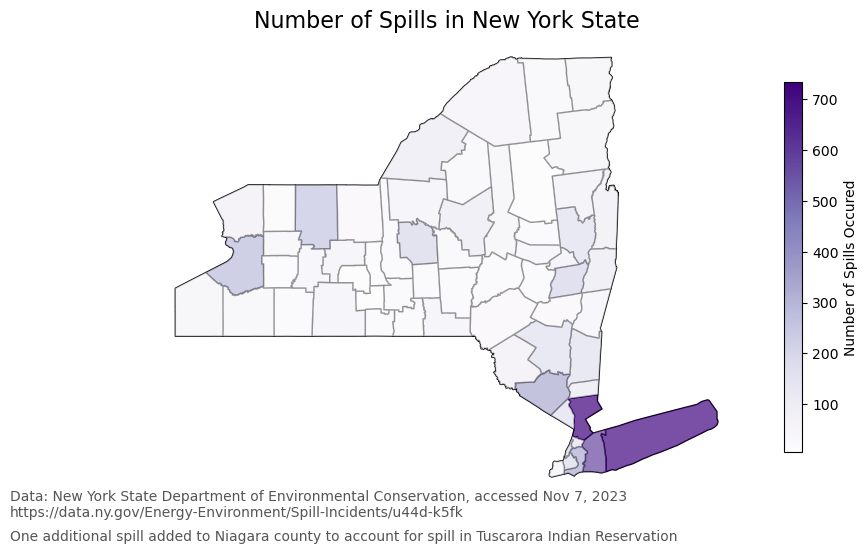

In [53]:
#Create an empty figure
fig, ax = plt.subplots(figsize=(10, 6))

#turn off axis
ax.axis('off')

#Put a title on the map
ax.set_title('Number of Spills in New York State', #add map title
fontsize=16) #change font size

# annotate the data source
ax.annotate("Data: New York State Department of Environmental Conservation, accessed Nov 7, 2023 \nhttps://data.ny.gov/Energy-Environment/Spill-Incidents/u44d-k5fk", 
            xy=(0.01, .07), # position of text
            xycoords='figure fraction', #coordinates are in range 0 to 1
            fontsize=10, #change font size
            color='#555555') #color

#add additional comment about the additional spill added to Niagara county
ax.annotate("One additional spill added to Niagara county to account for spill in Tuscarora Indian Reservation", 
            xy=(0.01, .03), # position of text
            xycoords='figure fraction', #coordinates are in range 0 to 1
            fontsize=10, #change font size
            color='#555555') #color

# add New York county to map
ny_counties.plot(ax=ax,
               color='none', #no color
               edgecolor = 'black') #border color is black

# add n_spills to map
ny_counties.plot(ax=ax, 
                  column='n_spills', #data column is using n_spills
                  legend=True, #add legend
                  cmap='Purples', #have color be purple hue
                  alpha=0.7, #transparency is 0.7
                  # adjust legend
                  legend_kwds={"shrink":.8, #shrink the legend
                                    'label': "Number of Spills Occured"}) #label the legend

## Final code

Collect all the relevant code into the first blank cell of the notebook titled "FINAL CODE". This single cell will have the end-to-end workflow: from importing libraries and loading the data, to producing the graph. The *only* ouput of this cell should be the graph you produced in the previous exercise. For each line, add a single comment explaining what the code does.